## Deep Learning

### Deep Learning ile Makine ogrenmesi 1-Classification 2- Regression 3-Clustering

1- Classification

In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential  # Siralama icin
from tensorflow.keras.layers import Dense  # Noronlari birbirine bagliyor

In [4]:
df=pd.read_csv("pima-indians-diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [9]:
y=df[['Outcome']] 

In [10]:
x=df.iloc[:,0:8]
y=df.iloc[:,8]  # Burada kisaca ustteki x,y ayrimini boylede yapabiliriz

In [12]:
x.shape

(768, 8)

In [13]:
model=Sequential()
model.add(Dense(8,activation='relu')) #8 sutun oldugu icin 8 ile basladik
model.add(Dense(12,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # sonuc evet mi hayir mi oldugu icin 1 ile bitirdik
model.compile(loss='binary_crossentropy',optimizer="adam",metrics="accuracy")

In [16]:
model.fit(x,y,epochs=150,batch_size=10,verbose=1)

Epoch 1/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5034 - accuracy: 0.7578
Epoch 2/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5033 - accuracy: 0.7643
Epoch 3/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 0.7474
Epoch 4/150
77/77 [==============================] - 0s 3ms/step - loss: 0.4970 - accuracy: 0.7591
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5061 - accuracy: 0.7552
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5028 - accuracy: 0.7682
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5134 - accuracy: 0.7526
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.7383
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.7500
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.7552
Epoch 11/

77/77 [==============================] - 0s 3ms/step - loss: 0.4949 - accuracy: 0.7565
Epoch 84/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.7578
Epoch 85/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.7526
Epoch 86/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7604
Epoch 87/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.7513
Epoch 88/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.7708
Epoch 89/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.7513
Epoch 90/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.7669
Epoch 91/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7604
Epoch 92/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.7656
Epoch 93/150


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 12)                108       
                                                                 
 dense_2 (Dense)             (None, 4)                 52        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


In [18]:
scores=model.evaluate(x,y)

24/24 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7773


In [19]:
scores[0] 

0.4803036153316498

In [20]:
scores[1]

0.77734375

In [21]:
#Early stopping - 150 epoch diye yazdik ama ideali 75 ise orada duruyor

In [25]:
history=model.fit(x,y,epochs=150,validation_split=0.20,batch_size=10,verbose=1)

Epoch 1/150
62/62 [==============================] - 1s 8ms/step - loss: 0.4662 - accuracy: 0.7655 - val_loss: 0.4553 - val_accuracy: 0.8442
Epoch 2/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4666 - accuracy: 0.7622 - val_loss: 0.4404 - val_accuracy: 0.7857
Epoch 3/150
62/62 [==============================] - 0s 4ms/step - loss: 0.4630 - accuracy: 0.7834 - val_loss: 0.4501 - val_accuracy: 0.8117
Epoch 4/150
62/62 [==============================] - 0s 5ms/step - loss: 0.4594 - accuracy: 0.7801 - val_loss: 0.4502 - val_accuracy: 0.7922
Epoch 5/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.7736 - val_loss: 0.4725 - val_accuracy: 0.7662
Epoch 6/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4609 - accuracy: 0.7752 - val_loss: 0.4672 - val_accuracy: 0.7922
Epoch 7/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4583 - accuracy: 0.7801 - val_loss: 0.4647 - val_accuracy: 0.7857
Epoch 8/150
6

Epoch 59/150
62/62 [==============================] - 0s 4ms/step - loss: 0.4428 - accuracy: 0.7785 - val_loss: 0.5736 - val_accuracy: 0.7792
Epoch 60/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4393 - accuracy: 0.7736 - val_loss: 0.5911 - val_accuracy: 0.7792
Epoch 61/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4436 - accuracy: 0.7785 - val_loss: 0.5966 - val_accuracy: 0.7792
Epoch 62/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4508 - accuracy: 0.7866 - val_loss: 0.5850 - val_accuracy: 0.7857
Epoch 63/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4516 - accuracy: 0.7736 - val_loss: 0.5836 - val_accuracy: 0.7662
Epoch 64/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4504 - accuracy: 0.7834 - val_loss: 0.6024 - val_accuracy: 0.7727
Epoch 65/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4438 - accuracy: 0.7720 - val_loss: 0.5945 - val_accuracy: 0.7662
Epoch 

62/62 [==============================] - 0s 3ms/step - loss: 0.4402 - accuracy: 0.7866 - val_loss: 0.6393 - val_accuracy: 0.7792
Epoch 117/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4312 - accuracy: 0.7932 - val_loss: 0.6411 - val_accuracy: 0.7857
Epoch 118/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4365 - accuracy: 0.7932 - val_loss: 0.6682 - val_accuracy: 0.7662
Epoch 119/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4316 - accuracy: 0.7818 - val_loss: 0.6382 - val_accuracy: 0.7857
Epoch 120/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4406 - accuracy: 0.7720 - val_loss: 0.6538 - val_accuracy: 0.7727
Epoch 121/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4406 - accuracy: 0.7801 - val_loss: 0.6350 - val_accuracy: 0.7727
Epoch 122/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4530 - accuracy: 0.7736 - val_loss: 0.6656 - val_accuracy: 0.8052
Epoch 123/150

In [24]:
import matplotlib.pyplot as plt

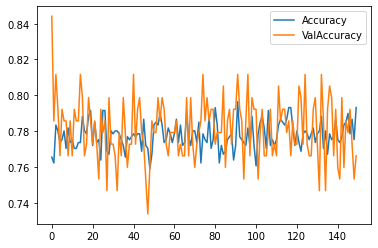

In [27]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='ValAccuracy')
plt.legend()

2-Regression

In [28]:
import pandas as pd

In [32]:
df=pd.read_pickle('kc_house.pkl')
pd.set_option("display.max_columns",100)

In [33]:
df.head()

,bedrooms,bathrooms,sqft_living,grade,view,basement,waterfront,floors,age,renovated,condition,sqft_above,price,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1180,7,0,0,0,1.0,65,0,3,1180,221900.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,9,5.0625,2570,7,0,1,0,2.0,69,1,3,2170,538000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,1.0000,770,6,0,0,0,1.0,87,0,3,770,180000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16,9.0000,1960,7,0,1,0,1.0,55,0,5,1050,604000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,9,4.0000,1680,8,0,0,0,1.0,33,0,3,1680,510000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
x=df.drop('price',axis=1)
y=df[["price"]]

In [35]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [55]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [58]:
model=Sequential()
model.add(Dense(19,activation='relu')) 
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer="Adam",loss="mse")

In [59]:
model.fit(x_train,y_train,epochs=1500,validation_data=(x_test,y_test),batch_size=128,verbose=1)
model.summary()

Epoch 1/1500
119/119 [==============================] - 2s 6ms/step - loss: 261887721472.0000 - val_loss: 184450138112.0000
Epoch 2/1500
119/119 [==============================] - 0s 3ms/step - loss: 54309625856.0000 - val_loss: 32792805376.0000
Epoch 3/1500
119/119 [==============================] - 0s 4ms/step - loss: 32233631744.0000 - val_loss: 32449263616.0000
Epoch 4/1500
119/119 [==============================] - 0s 3ms/step - loss: 31898097664.0000 - val_loss: 32101201920.0000
Epoch 5/1500
119/119 [==============================] - 0s 3ms/step - loss: 31526486016.0000 - val_loss: 31744624640.0000
Epoch 6/1500
119/119 [==============================] - 0s 4ms/step - loss: 31157129216.0000 - val_loss: 31408527360.0000
Epoch 7/1500
119/119 [==============================] - 0s 4ms/step - loss: 30759587840.0000 - val_loss: 31076098048.0000
Epoch 8/1500
119/119 [==============================] - 1s 4ms/step - loss: 30409873408.0000 - val_loss: 30661148672.0000
Epoch 9/1500
119/119 [

119/119 [==============================] - 1s 5ms/step - loss: 19868420096.0000 - val_loss: 20277516288.0000
Epoch 68/1500
119/119 [==============================] - 1s 4ms/step - loss: 19339288576.0000 - val_loss: 20152551424.0000
Epoch 69/1500
119/119 [==============================] - 1s 5ms/step - loss: 19156531200.0000 - val_loss: 19520684032.0000
Epoch 70/1500
119/119 [==============================] - 0s 4ms/step - loss: 18757814272.0000 - val_loss: 19629158400.0000
Epoch 71/1500
119/119 [==============================] - 0s 3ms/step - loss: 18620350464.0000 - val_loss: 19556628480.0000
Epoch 72/1500
119/119 [==============================] - 0s 4ms/step - loss: 18291689472.0000 - val_loss: 19121661952.0000
Epoch 73/1500
119/119 [==============================] - 0s 4ms/step - loss: 18039189504.0000 - val_loss: 18604597248.0000
Epoch 74/1500
119/119 [==============================] - 0s 3ms/step - loss: 17700712448.0000 - val_loss: 18617243648.0000
Epoch 75/1500
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 10461003776.0000 - val_loss: 11183641600.0000
Epoch 134/1500
119/119 [==============================] - 0s 3ms/step - loss: 10521111552.0000 - val_loss: 11243698176.0000
Epoch 135/1500
119/119 [==============================] - 0s 3ms/step - loss: 10439970816.0000 - val_loss: 11195230208.0000
Epoch 136/1500
119/119 [==============================] - 0s 3ms/step - loss: 10399038464.0000 - val_loss: 11069440000.0000
Epoch 137/1500
119/119 [==============================] - 0s 3ms/step - loss: 10444747776.0000 - val_loss: 11024436224.0000
Epoch 138/1500
119/119 [==============================] - 0s 3ms/step - loss: 10394065920.0000 - val_loss: 11079311360.0000
Epoch 139/1500
119/119 [==============================] - 0s 3ms/step - loss: 10275321856.0000 - val_loss: 11499261952.0000
Epoch 140/1500
119/119 [==============================] - 0s 3ms/step - loss: 10483096576.0000 - val_loss: 12562976768.0000
Epoch 141/1500
119/119 

119/119 [==============================] - 0s 3ms/step - loss: 9397509120.0000 - val_loss: 10407196672.0000
Epoch 200/1500
119/119 [==============================] - 0s 3ms/step - loss: 9340099584.0000 - val_loss: 10611730432.0000
Epoch 201/1500
119/119 [==============================] - 0s 3ms/step - loss: 9160885248.0000 - val_loss: 9810298880.0000
Epoch 202/1500
119/119 [==============================] - 0s 3ms/step - loss: 9079717888.0000 - val_loss: 9731722240.0000
Epoch 203/1500
119/119 [==============================] - 0s 3ms/step - loss: 9078592512.0000 - val_loss: 9671209984.0000
Epoch 204/1500
119/119 [==============================] - 0s 3ms/step - loss: 9081336832.0000 - val_loss: 9761860608.0000
Epoch 205/1500
119/119 [==============================] - 0s 3ms/step - loss: 9171963904.0000 - val_loss: 9679043584.0000
Epoch 206/1500
119/119 [==============================] - 0s 3ms/step - loss: 9170018304.0000 - val_loss: 9646048256.0000
Epoch 207/1500
119/119 [=============

119/119 [==============================] - 0s 3ms/step - loss: 8692238336.0000 - val_loss: 9224264704.0000
Epoch 267/1500
119/119 [==============================] - 0s 3ms/step - loss: 8577722368.0000 - val_loss: 9111816192.0000
Epoch 268/1500
119/119 [==============================] - 0s 3ms/step - loss: 8674538496.0000 - val_loss: 9196195840.0000
Epoch 269/1500
119/119 [==============================] - 0s 3ms/step - loss: 8559171584.0000 - val_loss: 9139358720.0000
Epoch 270/1500
119/119 [==============================] - 0s 3ms/step - loss: 8566543360.0000 - val_loss: 9263114240.0000
Epoch 271/1500
119/119 [==============================] - 0s 3ms/step - loss: 8711863296.0000 - val_loss: 9676759040.0000
Epoch 272/1500
119/119 [==============================] - 0s 3ms/step - loss: 8899223552.0000 - val_loss: 10263330816.0000
Epoch 273/1500
119/119 [==============================] - 0s 3ms/step - loss: 8628659200.0000 - val_loss: 9315492864.0000
Epoch 274/1500
119/119 [==============

119/119 [==============================] - 0s 3ms/step - loss: 8574829056.0000 - val_loss: 9304147968.0000
Epoch 334/1500
119/119 [==============================] - 0s 3ms/step - loss: 8483806720.0000 - val_loss: 9054964736.0000
Epoch 335/1500
119/119 [==============================] - 0s 3ms/step - loss: 8418176000.0000 - val_loss: 9248193536.0000
Epoch 336/1500
119/119 [==============================] - 0s 3ms/step - loss: 8511890432.0000 - val_loss: 8935860224.0000
Epoch 337/1500
119/119 [==============================] - 0s 3ms/step - loss: 8579589120.0000 - val_loss: 8897745920.0000
Epoch 338/1500
119/119 [==============================] - 0s 3ms/step - loss: 8332887552.0000 - val_loss: 8961553408.0000
Epoch 339/1500
119/119 [==============================] - 0s 3ms/step - loss: 8340847104.0000 - val_loss: 8895557632.0000
Epoch 340/1500
119/119 [==============================] - 0s 3ms/step - loss: 8371173376.0000 - val_loss: 9083891712.0000
Epoch 341/1500
119/119 [===============

119/119 [==============================] - 0s 3ms/step - loss: 8461286912.0000 - val_loss: 8967419904.0000
Epoch 401/1500
119/119 [==============================] - 0s 3ms/step - loss: 8341145088.0000 - val_loss: 8849585152.0000
Epoch 402/1500
119/119 [==============================] - 0s 3ms/step - loss: 8199979520.0000 - val_loss: 8785929216.0000
Epoch 403/1500
119/119 [==============================] - 0s 4ms/step - loss: 8213120000.0000 - val_loss: 9384910848.0000
Epoch 404/1500
119/119 [==============================] - 0s 3ms/step - loss: 8432163328.0000 - val_loss: 11220259840.0000
Epoch 405/1500
119/119 [==============================] - 0s 3ms/step - loss: 8499121152.0000 - val_loss: 8811185152.0000
Epoch 406/1500
119/119 [==============================] - 0s 3ms/step - loss: 8115766784.0000 - val_loss: 8844310528.0000
Epoch 407/1500
119/119 [==============================] - 0s 3ms/step - loss: 8212044288.0000 - val_loss: 9138665472.0000
Epoch 408/1500
119/119 [==============

119/119 [==============================] - 0s 3ms/step - loss: 8082925056.0000 - val_loss: 8672753664.0000
Epoch 468/1500
119/119 [==============================] - 0s 3ms/step - loss: 8215276032.0000 - val_loss: 8740081664.0000
Epoch 469/1500
119/119 [==============================] - 0s 3ms/step - loss: 8152016384.0000 - val_loss: 8714008576.0000
Epoch 470/1500
119/119 [==============================] - 0s 3ms/step - loss: 8128373760.0000 - val_loss: 8735768576.0000
Epoch 471/1500
119/119 [==============================] - 0s 3ms/step - loss: 8103838720.0000 - val_loss: 8701147136.0000
Epoch 472/1500
119/119 [==============================] - 0s 3ms/step - loss: 8212787712.0000 - val_loss: 9449486336.0000
Epoch 473/1500
119/119 [==============================] - 0s 3ms/step - loss: 8117573632.0000 - val_loss: 8827696128.0000
Epoch 474/1500
119/119 [==============================] - 0s 3ms/step - loss: 8194210304.0000 - val_loss: 8755376128.0000
Epoch 475/1500
119/119 [===============

119/119 [==============================] - 0s 3ms/step - loss: 8030266880.0000 - val_loss: 8858183680.0000
Epoch 535/1500
119/119 [==============================] - 0s 3ms/step - loss: 8230184448.0000 - val_loss: 9684779008.0000
Epoch 536/1500
119/119 [==============================] - 0s 3ms/step - loss: 8043778560.0000 - val_loss: 8674442240.0000
Epoch 537/1500
119/119 [==============================] - 0s 3ms/step - loss: 8193857536.0000 - val_loss: 9175870464.0000
Epoch 538/1500
119/119 [==============================] - 0s 3ms/step - loss: 8436332032.0000 - val_loss: 9997237248.0000
Epoch 539/1500
119/119 [==============================] - 0s 3ms/step - loss: 7966718976.0000 - val_loss: 9235512320.0000
Epoch 540/1500
119/119 [==============================] - 0s 3ms/step - loss: 8149364736.0000 - val_loss: 9166226432.0000
Epoch 541/1500
119/119 [==============================] - 0s 3ms/step - loss: 8073190400.0000 - val_loss: 8678705152.0000
Epoch 542/1500
119/119 [===============

119/119 [==============================] - 0s 3ms/step - loss: 7907138048.0000 - val_loss: 8552552960.0000
Epoch 602/1500
119/119 [==============================] - 0s 3ms/step - loss: 8003883008.0000 - val_loss: 9018672128.0000
Epoch 603/1500
119/119 [==============================] - 0s 3ms/step - loss: 7886225920.0000 - val_loss: 8696776704.0000
Epoch 604/1500
119/119 [==============================] - 0s 3ms/step - loss: 7909702144.0000 - val_loss: 8604962816.0000
Epoch 605/1500
119/119 [==============================] - 0s 3ms/step - loss: 8014343680.0000 - val_loss: 8866856960.0000
Epoch 606/1500
119/119 [==============================] - 0s 3ms/step - loss: 8084080640.0000 - val_loss: 8599790592.0000
Epoch 607/1500
119/119 [==============================] - 0s 3ms/step - loss: 7914891264.0000 - val_loss: 9048161280.0000
Epoch 608/1500
119/119 [==============================] - 0s 3ms/step - loss: 7981402112.0000 - val_loss: 9578374144.0000
Epoch 609/1500
119/119 [===============

119/119 [==============================] - 0s 3ms/step - loss: 7846682624.0000 - val_loss: 8526415360.0000
Epoch 669/1500
119/119 [==============================] - 0s 3ms/step - loss: 7952996352.0000 - val_loss: 9226077184.0000
Epoch 670/1500
119/119 [==============================] - 0s 3ms/step - loss: 7934258688.0000 - val_loss: 8870022144.0000
Epoch 671/1500
119/119 [==============================] - 0s 3ms/step - loss: 7843594752.0000 - val_loss: 8534808064.0000
Epoch 672/1500
119/119 [==============================] - 0s 3ms/step - loss: 7932681216.0000 - val_loss: 8551044096.0000
Epoch 673/1500
119/119 [==============================] - 0s 3ms/step - loss: 7982362624.0000 - val_loss: 8534274560.0000
Epoch 674/1500
119/119 [==============================] - 0s 3ms/step - loss: 7860775424.0000 - val_loss: 8515822592.0000
Epoch 675/1500
119/119 [==============================] - 0s 3ms/step - loss: 7973790720.0000 - val_loss: 8452611072.0000
Epoch 676/1500
119/119 [===============

119/119 [==============================] - 0s 3ms/step - loss: 7795396608.0000 - val_loss: 8577820672.0000
Epoch 736/1500
119/119 [==============================] - 0s 3ms/step - loss: 7741816320.0000 - val_loss: 9004013568.0000
Epoch 737/1500
119/119 [==============================] - 0s 3ms/step - loss: 8164461568.0000 - val_loss: 9065821184.0000
Epoch 738/1500
119/119 [==============================] - 0s 3ms/step - loss: 7773941760.0000 - val_loss: 8456398848.0000
Epoch 739/1500
119/119 [==============================] - 0s 3ms/step - loss: 7831565824.0000 - val_loss: 8605966336.0000
Epoch 740/1500
119/119 [==============================] - 0s 3ms/step - loss: 7884663296.0000 - val_loss: 9109127168.0000
Epoch 741/1500
119/119 [==============================] - 0s 4ms/step - loss: 7905510912.0000 - val_loss: 8724910080.0000
Epoch 742/1500
119/119 [==============================] - 0s 3ms/step - loss: 7916253696.0000 - val_loss: 8579474944.0000
Epoch 743/1500
119/119 [===============

119/119 [==============================] - 0s 3ms/step - loss: 7705549312.0000 - val_loss: 8418903040.0000
Epoch 803/1500
119/119 [==============================] - 0s 3ms/step - loss: 7796028416.0000 - val_loss: 8661500928.0000
Epoch 804/1500
119/119 [==============================] - 0s 4ms/step - loss: 7874513408.0000 - val_loss: 8400777728.0000
Epoch 805/1500
119/119 [==============================] - 0s 3ms/step - loss: 7738629632.0000 - val_loss: 8369818112.0000
Epoch 806/1500
119/119 [==============================] - 0s 4ms/step - loss: 7715250688.0000 - val_loss: 8464617472.0000
Epoch 807/1500
119/119 [==============================] - 0s 3ms/step - loss: 7858720768.0000 - val_loss: 8475156992.0000
Epoch 808/1500
119/119 [==============================] - 0s 4ms/step - loss: 7924168192.0000 - val_loss: 8579110912.0000
Epoch 809/1500
119/119 [==============================] - 0s 4ms/step - loss: 7801761792.0000 - val_loss: 8742307840.0000
Epoch 810/1500
119/119 [===============

119/119 [==============================] - 0s 3ms/step - loss: 7693247488.0000 - val_loss: 8360415744.0000
Epoch 870/1500
119/119 [==============================] - 0s 3ms/step - loss: 7725633024.0000 - val_loss: 8396648448.0000
Epoch 871/1500
119/119 [==============================] - 0s 3ms/step - loss: 7878908928.0000 - val_loss: 8443429888.0000
Epoch 872/1500
119/119 [==============================] - 0s 3ms/step - loss: 7604696576.0000 - val_loss: 8412970496.0000
Epoch 873/1500
119/119 [==============================] - 0s 3ms/step - loss: 7783716864.0000 - val_loss: 8342243328.0000
Epoch 874/1500
119/119 [==============================] - 0s 3ms/step - loss: 8199293440.0000 - val_loss: 10104526848.0000
Epoch 875/1500
119/119 [==============================] - 0s 3ms/step - loss: 8028114432.0000 - val_loss: 8386544640.0000
Epoch 876/1500
119/119 [==============================] - 0s 3ms/step - loss: 7652841984.0000 - val_loss: 8451768320.0000
Epoch 877/1500
119/119 [==============

119/119 [==============================] - 0s 3ms/step - loss: 7659033088.0000 - val_loss: 8529887744.0000
Epoch 937/1500
119/119 [==============================] - 0s 3ms/step - loss: 7666456064.0000 - val_loss: 8397729792.0000
Epoch 938/1500
119/119 [==============================] - 0s 3ms/step - loss: 7885286400.0000 - val_loss: 8693468160.0000
Epoch 939/1500
119/119 [==============================] - 0s 3ms/step - loss: 7785320960.0000 - val_loss: 8706052096.0000
Epoch 940/1500
119/119 [==============================] - 0s 3ms/step - loss: 7500283904.0000 - val_loss: 8313500672.0000
Epoch 941/1500
119/119 [==============================] - 0s 3ms/step - loss: 7859198976.0000 - val_loss: 8561581056.0000
Epoch 942/1500
119/119 [==============================] - 0s 3ms/step - loss: 7687056896.0000 - val_loss: 9278699520.0000
Epoch 943/1500
119/119 [==============================] - 0s 3ms/step - loss: 7681987584.0000 - val_loss: 8295510528.0000
Epoch 944/1500
119/119 [===============

119/119 [==============================] - 0s 3ms/step - loss: 7647851008.0000 - val_loss: 8315078144.0000
Epoch 1004/1500
119/119 [==============================] - 0s 3ms/step - loss: 7667701248.0000 - val_loss: 8352052224.0000
Epoch 1005/1500
119/119 [==============================] - 0s 3ms/step - loss: 7651392512.0000 - val_loss: 8268843520.0000
Epoch 1006/1500
119/119 [==============================] - 0s 3ms/step - loss: 7556420608.0000 - val_loss: 8441938944.0000
Epoch 1007/1500
119/119 [==============================] - 0s 3ms/step - loss: 7830770688.0000 - val_loss: 9698037760.0000
Epoch 1008/1500
119/119 [==============================] - 0s 3ms/step - loss: 7762056704.0000 - val_loss: 8724732928.0000
Epoch 1009/1500
119/119 [==============================] - 0s 4ms/step - loss: 7759614976.0000 - val_loss: 8615556096.0000
Epoch 1010/1500
119/119 [==============================] - 0s 3ms/step - loss: 7564556800.0000 - val_loss: 8346283520.0000
Epoch 1011/1500
119/119 [=======

Epoch 1070/1500
119/119 [==============================] - 0s 3ms/step - loss: 7722660352.0000 - val_loss: 8296507392.0000
Epoch 1071/1500
119/119 [==============================] - 0s 3ms/step - loss: 7580864512.0000 - val_loss: 8327880704.0000
Epoch 1072/1500
119/119 [==============================] - 0s 3ms/step - loss: 7590945280.0000 - val_loss: 8804442112.0000
Epoch 1073/1500
119/119 [==============================] - 0s 3ms/step - loss: 7535388672.0000 - val_loss: 8439594496.0000
Epoch 1074/1500
119/119 [==============================] - 0s 3ms/step - loss: 7548421632.0000 - val_loss: 8283170816.0000
Epoch 1075/1500
119/119 [==============================] - 0s 3ms/step - loss: 7575570944.0000 - val_loss: 8282838016.0000
Epoch 1076/1500
119/119 [==============================] - 0s 3ms/step - loss: 7541752320.0000 - val_loss: 8323482112.0000
Epoch 1077/1500
119/119 [==============================] - 0s 3ms/step - loss: 7559168512.0000 - val_loss: 9250296832.0000
Epoch 1078/1500


119/119 [==============================] - 0s 3ms/step - loss: 7555953152.0000 - val_loss: 8264942592.0000
Epoch 1137/1500
119/119 [==============================] - 0s 3ms/step - loss: 7488147456.0000 - val_loss: 9569632256.0000
Epoch 1138/1500
119/119 [==============================] - 0s 3ms/step - loss: 7629190144.0000 - val_loss: 8959742976.0000
Epoch 1139/1500
119/119 [==============================] - 0s 4ms/step - loss: 7679750656.0000 - val_loss: 8204528640.0000
Epoch 1140/1500
119/119 [==============================] - 0s 3ms/step - loss: 7530987520.0000 - val_loss: 8419278336.0000
Epoch 1141/1500
119/119 [==============================] - 0s 3ms/step - loss: 7668089856.0000 - val_loss: 8474416640.0000
Epoch 1142/1500
119/119 [==============================] - 0s 3ms/step - loss: 7452992000.0000 - val_loss: 8243999232.0000
Epoch 1143/1500
119/119 [==============================] - 0s 3ms/step - loss: 7548889600.0000 - val_loss: 8518890496.0000
Epoch 1144/1500
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 7514732544.0000 - val_loss: 8212184576.0000
Epoch 1203/1500
119/119 [==============================] - 0s 3ms/step - loss: 7760956928.0000 - val_loss: 8210313216.0000
Epoch 1204/1500
119/119 [==============================] - 0s 3ms/step - loss: 7578799104.0000 - val_loss: 8294411264.0000
Epoch 1205/1500
119/119 [==============================] - 0s 3ms/step - loss: 7657441280.0000 - val_loss: 8430905856.0000
Epoch 1206/1500
119/119 [==============================] - 0s 3ms/step - loss: 7837006336.0000 - val_loss: 8888413184.0000
Epoch 1207/1500
119/119 [==============================] - 0s 3ms/step - loss: 7458963968.0000 - val_loss: 8365585920.0000
Epoch 1208/1500
119/119 [==============================] - 0s 3ms/step - loss: 7765531648.0000 - val_loss: 8399848448.0000
Epoch 1209/1500
119/119 [==============================] - 0s 3ms/step - loss: 7610492416.0000 - val_loss: 8542027776.0000
Epoch 1210/1500
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 7581459968.0000 - val_loss: 8197210112.0000
Epoch 1269/1500
119/119 [==============================] - 0s 3ms/step - loss: 7507920896.0000 - val_loss: 8459986432.0000
Epoch 1270/1500
119/119 [==============================] - 0s 3ms/step - loss: 7660676608.0000 - val_loss: 8275028480.0000
Epoch 1271/1500
119/119 [==============================] - 0s 3ms/step - loss: 7457644032.0000 - val_loss: 9635540992.0000
Epoch 1272/1500
119/119 [==============================] - 0s 3ms/step - loss: 7755592704.0000 - val_loss: 8293012992.0000
Epoch 1273/1500
119/119 [==============================] - 0s 3ms/step - loss: 7655628288.0000 - val_loss: 8387650048.0000
Epoch 1274/1500
119/119 [==============================] - 0s 3ms/step - loss: 7476484608.0000 - val_loss: 8523458048.0000
Epoch 1275/1500
119/119 [==============================] - 0s 3ms/step - loss: 7463884288.0000 - val_loss: 8431379968.0000
Epoch 1276/1500
119/119 [=======

Epoch 1335/1500
119/119 [==============================] - 0s 4ms/step - loss: 7478420480.0000 - val_loss: 8220678656.0000
Epoch 1336/1500
119/119 [==============================] - 0s 4ms/step - loss: 7467976192.0000 - val_loss: 9241559040.0000
Epoch 1337/1500
119/119 [==============================] - 0s 4ms/step - loss: 7757110272.0000 - val_loss: 8775340032.0000
Epoch 1338/1500
119/119 [==============================] - 0s 4ms/step - loss: 7566257664.0000 - val_loss: 9315828736.0000
Epoch 1339/1500
119/119 [==============================] - 0s 3ms/step - loss: 7557441536.0000 - val_loss: 10270852096.0000
Epoch 1340/1500
119/119 [==============================] - 0s 3ms/step - loss: 7611217920.0000 - val_loss: 8353250816.0000
Epoch 1341/1500
119/119 [==============================] - 0s 3ms/step - loss: 7519680000.0000 - val_loss: 8315134464.0000
Epoch 1342/1500
119/119 [==============================] - 0s 3ms/step - loss: 7381263360.0000 - val_loss: 8354349568.0000
Epoch 1343/1500

119/119 [==============================] - 0s 3ms/step - loss: 7504623104.0000 - val_loss: 8238024192.0000
Epoch 1402/1500
119/119 [==============================] - 0s 3ms/step - loss: 7504967168.0000 - val_loss: 9728561152.0000
Epoch 1403/1500
119/119 [==============================] - 0s 3ms/step - loss: 7611883520.0000 - val_loss: 8138631168.0000
Epoch 1404/1500
119/119 [==============================] - 0s 3ms/step - loss: 7367909888.0000 - val_loss: 8334519808.0000
Epoch 1405/1500
119/119 [==============================] - 0s 3ms/step - loss: 7494060032.0000 - val_loss: 9084365824.0000
Epoch 1406/1500
119/119 [==============================] - 0s 3ms/step - loss: 7428217856.0000 - val_loss: 8717494272.0000
Epoch 1407/1500
119/119 [==============================] - 0s 3ms/step - loss: 7623625728.0000 - val_loss: 8820499456.0000
Epoch 1408/1500
119/119 [==============================] - 0s 3ms/step - loss: 7474591744.0000 - val_loss: 8131557888.0000
Epoch 1409/1500
119/119 [=======

Epoch 1468/1500
119/119 [==============================] - 0s 4ms/step - loss: 7507067392.0000 - val_loss: 8967359488.0000
Epoch 1469/1500
119/119 [==============================] - 0s 4ms/step - loss: 7436756480.0000 - val_loss: 8182277632.0000
Epoch 1470/1500
119/119 [==============================] - 0s 4ms/step - loss: 7714510848.0000 - val_loss: 8574618624.0000
Epoch 1471/1500
119/119 [==============================] - 0s 4ms/step - loss: 7373435904.0000 - val_loss: 8439713792.0000
Epoch 1472/1500
119/119 [==============================] - 1s 5ms/step - loss: 7287247872.0000 - val_loss: 8318236672.0000
Epoch 1473/1500
119/119 [==============================] - 1s 5ms/step - loss: 7604989952.0000 - val_loss: 8642007040.0000
Epoch 1474/1500
119/119 [==============================] - 0s 4ms/step - loss: 7449938432.0000 - val_loss: 8228813824.0000
Epoch 1475/1500
119/119 [==============================] - 1s 6ms/step - loss: 7491697152.0000 - val_loss: 8343410688.0000
Epoch 1476/1500


In [60]:
loss_df=pd.DataFrame(model.history.history)

<AxesSubplot:>

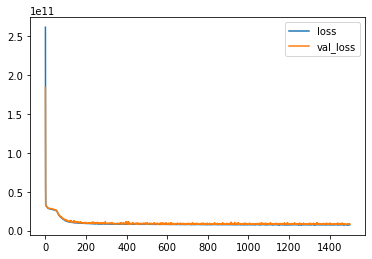

In [61]:
loss_df.plot()

In [62]:
tahmin=model.predict(x)

595/595 [==============================] - 1s 2ms/step


In [63]:
from sklearn.metrics import mean_squared_error,r2_score

In [64]:
r2_score(tahmin,y)

0.8167582000576423

In [65]:
(mean_squared_error(tahmin,y))**0.5

87089.0950962066